## EE 521: Digital Signal Processors Lab
## Assignment 5

- Submitted by:
 - Sqn Ldr Monark Singh
 - 214102322

In [1]:
# Importing the dependencies
import numpy as np
from numpy import*
import matplotlib.pyplot as plt
from sympy import*
import sympy as sp
from scipy import signal
import cmath
import time

### Question 1:

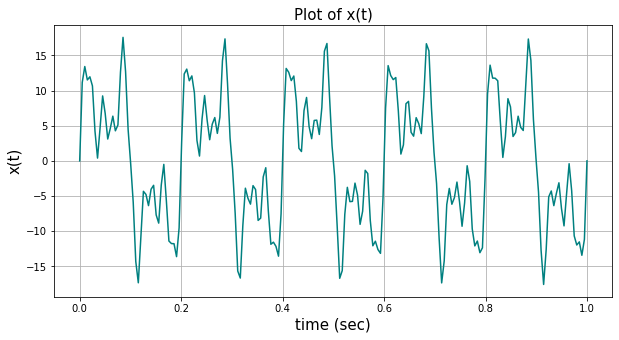

In [2]:
Fs = 200    # Sampling Frequency
t = np.linspace(0,1,Fs)
N = len(t)

# Given Frequencies (in Hz)
f1 = 5
f2 = 15
f3 = 25
f4 = 50

x = np.zeros(N)

for i in range(N):
    x[i] = 9*np.sin(2*np.pi*f1*t[i]) + 7*np.sin(2*np.pi*f2*t[i]) + 5*np.sin(2*np.pi*f3*t[i]) + 3*np.sin(2*np.pi*f4*t[i])

plt.figure(figsize=(10,5))
plt.plot(t,x, color='teal')
plt.xlabel('time (sec)',size=15)
plt.ylabel('x(t)',size=15)
plt.title('Plot of x(t)',size=15)

plt.grid()
plt.show()

### Computing DFT

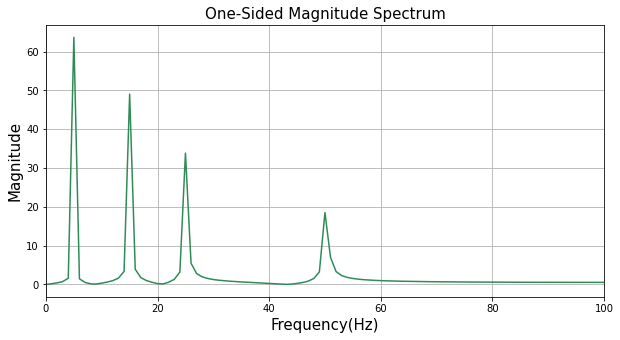

In [3]:
# Defining a 2D array
rows = N 
cols = N

W = [[0 for i in range(rows)] for j in range(cols)]

# Computing the Fourier Coefficients using DFT
for i in range(rows):
    for k in range(cols):
        W[i][k] = np.exp(2j*np.pi*k/N)**i

X = (1/np.sqrt(N)) * np.dot(W,x)

# Computing the magnitude spectrum
magnitude = abs(X)

plt.figure(figsize=(10,5))
plt.plot(magnitude, color='seagreen')
plt.xlim(0,100)
plt.xlabel('Frequency(Hz)',size=15)
plt.ylabel('Magnitude',size=15)
plt.title('One-Sided Magnitude Spectrum',size=15)
plt.grid()
plt.show()

### Butterworth  Bandpass Filter:

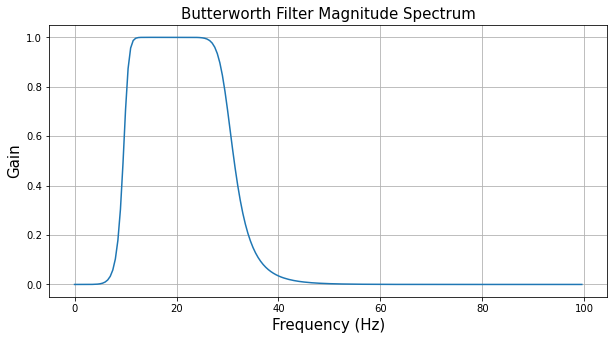

In [5]:
# Defining lower and higher cutoff frequency
low_cut = 10
high_cut = 30

# Computing the filter coefficients (Numerator and Denominator)
b, a = signal.butter(6, [low_cut,high_cut], btype='bandpass', fs = Fs)

# Computing the frequency response
w, h = signal.freqz(b, a, fs=Fs, worN=Fs)

# Plotting the magnitude spectrum
plt.figure(figsize=(10,5))
plt.plot(w, abs(h))

plt.title('Butterworth Filter Magnitude Spectrum',size=15)
plt.xlabel('Frequency (Hz)',size=15)
plt.ylabel('Gain',size=15)

plt.grid()
plt.show()

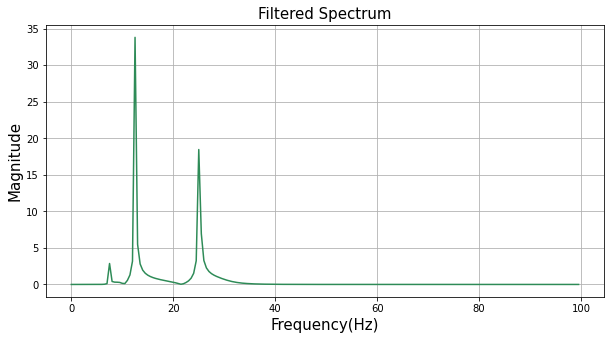

In [6]:
# Multiplying frequency response of bandpass filter and DFT spectrum of x(t) to obtain the filtered spectrum

y1 = [0j]*N

for i in range(N):
    y1[i] = np.dot(h[i],X[i])
    
# Computing the magnitude of filtered spectrum
mag = [0]*N
phase = [0]*N

for i in range(N):
    mag[i],phase[i] = cmath.polar(y1[i])
    
plt.figure(figsize=(10,5))
plt.plot(w,mag, color='seagreen')
plt.title('Filtered Spectrum',size=15)
plt.xlabel('Frequency(Hz)',size=15)
plt.ylabel('Magnitude',size=15)

plt.grid()
plt.show()

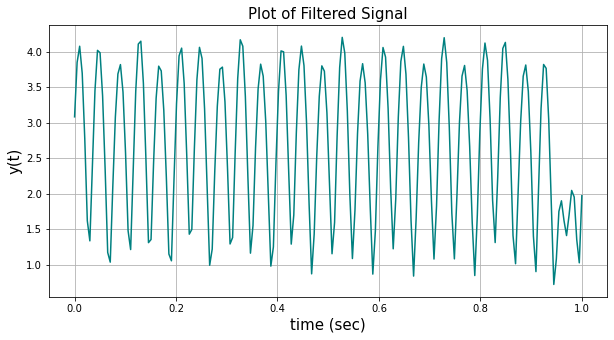

In [7]:
# Computing inverse of the DFT Matrix
W_inv = np.linalg.inv(W)

# Applying inverse DFT on the filtered spectrum to obtain the filtered signal
Y1 = (np.sqrt(N)) * np.dot(W_inv,y1)

# Plotting the filtered signal

plt.figure(figsize=(10,5))
plt.plot(t,abs(Y1), color='teal')
plt.xlabel('time (sec)',size=15)
plt.ylabel('y(t)',size=15)
plt.title('Plot of Filtered Signal',size=15)

plt.grid()
plt.show()

### Question 2:

### Band-Stop Filter:
### Transfer function of the filter (calculated manually):
$$ H(z) = \frac{0.82}{1-0.18 e^{-j2w}}\
$$

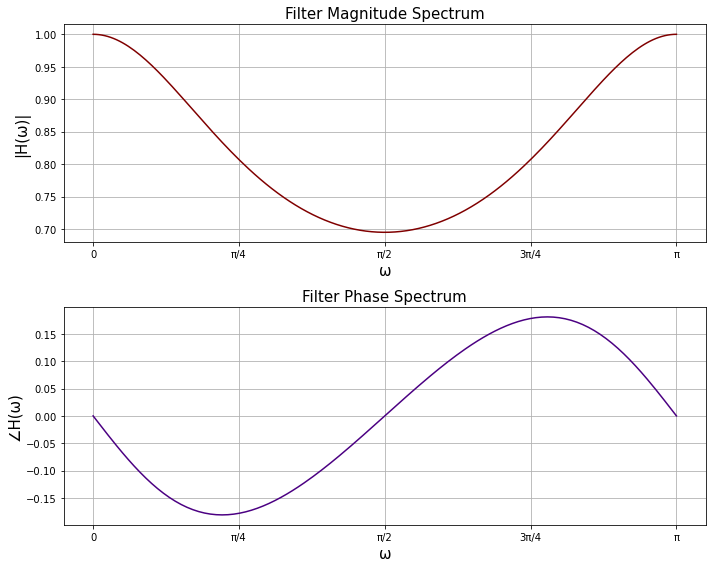

In [8]:
omega = np.linspace(0,np.pi,N)
H_bandstop = [0j]*N

# Defining the transfer function of filter
for i in range(N):
    H_bandstop[i] = 0.82 / (1-0.18*np.exp(-2j*omega[i]))
    
# Computing the magnitude and phase spectrum of the filter
filter_mag = [0]*N
filter_phase = [0]*N

for i in range(N):
    filter_mag[i],filter_phase[i] = cmath.polar(H_bandstop[i])
    

# Plotting the frequency spectrum of the signal
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(omega,filter_mag, color='maroon')
plt.title('Filter Magnitude Spectrum',size=15)
plt.xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π'])
plt.xlabel('ω', size=15)
plt.ylabel('|H(ω)|', size=15)
plt.grid()

plt.subplot(2,1,2)
plt.plot(omega,filter_phase, color='indigo')
plt.title('Filter Phase Spectrum',size=15)
plt.xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π'])
plt.xlabel('ω', size=15)
plt.ylabel('∠H(ω)', size=15)
plt.grid()

plt.tight_layout()
plt.show()

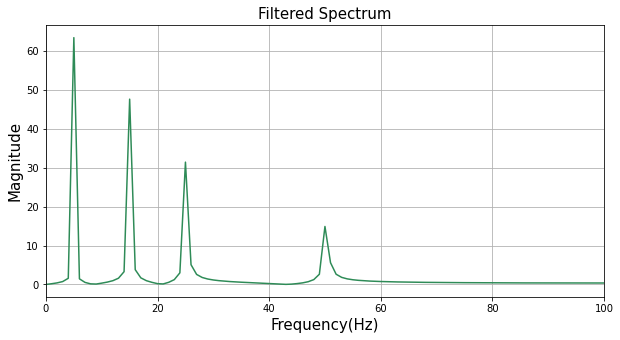

In [9]:
# Multiplying frequency response of the bandstop filter and DFT spectrum of x(t) to obtain the filtered spectrum

y2 = [0j]*N

for i in range(N):
    y2[i] = np.dot(H_bandstop[i],X[i])
    
# Computing the magnitude of filtered spectrum
mag = [0]*N
phase = [0]*N

for i in range(N):
    mag[i],phase[i] = cmath.polar(y2[i])
    
plt.figure(figsize=(10,5))
plt.plot(mag, color='seagreen')
plt.xlim(0,100)
plt.title('Filtered Spectrum',size=15)
plt.xlabel('Frequency(Hz)',size=15)
plt.ylabel('Magnitude',size=15)

plt.grid()
plt.show()

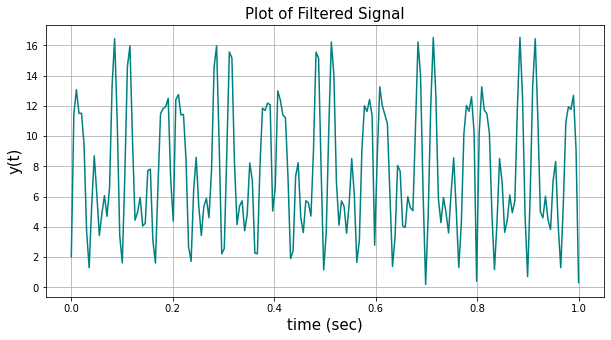

In [10]:
# Applying inverse DFT on the filtered spectrum to obtain the filtered signal
Y2 = (np.sqrt(N)) * np.dot(W_inv,y2)

# Plotting the filtered signal

plt.figure(figsize=(10,5))
plt.plot(t,abs(Y2), color='teal')
plt.xlabel('time (sec)',size=15)
plt.ylabel('y(t)',size=15)
plt.title('Plot of Filtered Signal',size=15)

plt.grid()
plt.show()

### Question 3:

- Given transfer function:

$$H(z) = \frac{−0.2 + 0.18z^{-1} + 0.4z^{−2} + z^{−3}}{1 + 0.4z^{−1} + 0.18z^{−2} − 0.2z^{−3}}\
$$

In [11]:
# Finding the Poles and Zeros

Num_coeff = [-0.2, 0.18, 0.4, 1]
Den_coeff = [1, 0.4, 0.18, -0.2]

poles = np.roots(Den_coeff)
zeros = np.roots(Num_coeff)

print(f'\nPoles of H(z) are:\n{poles[0]:.2f}\t{poles[1]:.2f}\t{poles[2]:.2f}')
print(f'\nZeros of H(z) are:\n{zeros[1]:.2f}\t{zeros[2]:.2f}\t{zeros[0]:.2f}')


Poles of H(z) are:
-0.40+0.58j	-0.40-0.58j	0.40+0.00j

Zeros of H(z) are:
-0.80+1.17j	-0.80-1.17j	2.50+0.00j


- This filter is an All-pass Filter
- The Pole-Zero pairs are Complex Reciprocals of each other.

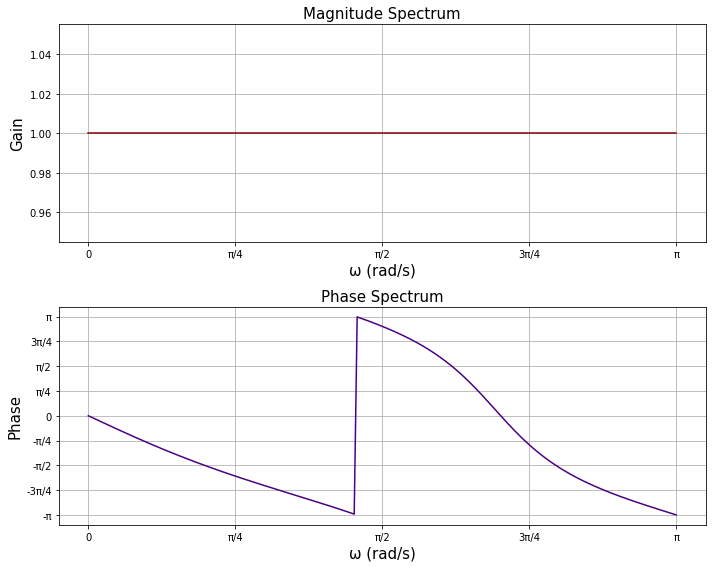

In [13]:
# Defining the transfer function H(Z)

w = np.linspace(0,np.pi,200)
N = len(w)
H = [0j]*N

for i in range(N):
    H[i] = (-0.2+0.18*np.exp(-1j*w[i])+0.4*np.exp(-2j*w[i])+np.exp(-3j*w[i])) / (1+0.4*np.exp(-1j*w[i])+0.18*np.exp(-2j*w[i])-0.2*np.exp(-3j*w[i]))
    
# Computing the magnitude and phase spectrum
mag = [0]*N
phase = [0]*N

for i in range(N):
    mag[i],phase[i] = cmath.polar(H[i])


phase1 = np.zeros(N)

for i in range(N):
    phase1[i] = phase[i-int(N/2)]
    
# Plotting the frequency spectrum of the signal
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(w,mag, color='maroon')
plt.title('Magnitude Spectrum',size=15)
plt.xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π'])
plt.xlabel('ω (rad/s)', size=15)
plt.ylabel('Gain', size=15)
plt.grid()

plt.subplot(2,1,2)
plt.plot(w,phase, color='indigo')
plt.title('Phase Spectrum',size=15)
plt.xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π'])
plt.yticks(np.arange(-np.pi, np.pi+np.pi/4, step=(np.pi/4)), ['-π','-3π/4','-π/2','-π/4','0','π/4','π/2','3π/4','π'])
plt.xlabel('ω (rad/s)', size=15)
plt.ylabel('Phase', size=15)
plt.grid()

plt.tight_layout()
plt.show()


### Question 4:

### Transfer function of the 3rd order Chebyshev Highpass Filter:
$$ H(s) = \frac{2s^3}{(s+3.2)(s^2 + 0.78s + 2.46)}\
$$

### Frequency Response of the Chebyshev Filter:

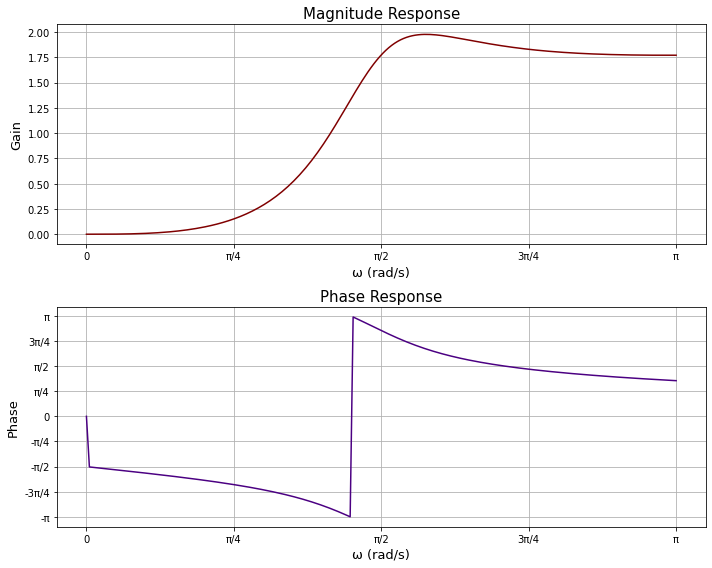

In [14]:
# Defining the transfer function H(s)

w = np.linspace(0,np.pi,200)
N = len(w)
H = [0j]*N

for i in range(N):
    s = 1j*w[i]
    H[i] = (2 * s**3) / ((s + 3.2)*(s**2 + 0.78*s + 2.46))
    
# Computing the magnitude and phase spectrum
mag = [0]*N
phase = [0]*N

for i in range(N):
    mag[i],phase[i] = cmath.polar(H[i])


phase1 = np.zeros(N)

for i in range(N):
    phase1[i] = phase[i-int(N/2)]
    
# Plotting the frequency spectrum of the signal
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(w,mag, color='maroon')
plt.title('Magnitude Response',size=15)
plt.xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π'])
plt.xlabel('ω (rad/s)', size=13)
plt.ylabel('Gain', size=13)
plt.grid()

plt.subplot(2,1,2)
plt.plot(w,phase, color='indigo')
plt.title('Phase Response',size=15)
plt.xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0','π/4','π/2','3π/4','π'])
plt.yticks(np.arange(-np.pi, np.pi+np.pi/4, step=(np.pi/4)), ['-π','-3π/4','-π/2','-π/4','0','π/4','π/2','3π/4','π'])
plt.xlabel('ω (rad/s)', size=13)
plt.ylabel('Phase', size=13)
plt.grid()

plt.tight_layout()
plt.show()


### Poles:
- s = -3.2
- s = -0.39 + j 1.52
- s = -0.39 - j 1.52

### Zeros:
- Triple zero at s = 0

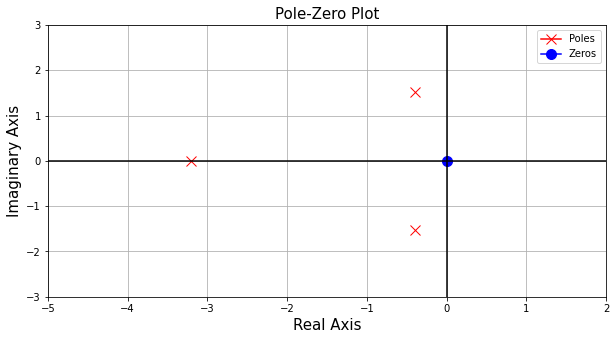

In [15]:
## Pole-Zero Plot

# Defining Poles and Zeros
p1 = -3.2
p2_re = -0.39
p2_im = 1.52
p3_re = -0.39
p3_im = -1.52
z1 = 0

plt.figure(figsize=(10,5))
plt.plot(p1,0, marker='x',markersize=10, color='red', label='Poles')
plt.plot(p2_re,p2_im, marker='x',markersize=10, color='red')
plt.plot(p3_re,p3_im, marker='x',markersize=10, color='red')
plt.plot(z1,0, marker='o',markersize=10, color='blue', label='Zeros')
plt.xlim(-5,2)
plt.ylim(-3,3)
plt.title('Pole-Zero Plot', size=15)
plt.xlabel('Real Axis',size=15)
plt.ylabel('Imaginary Axis',size=15)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()
plt.grid()
plt.show()

### Question 5:

### Transfer function of Lowpass Butterworth Filter:
$$ H(s) = \frac{1.39}{s^2 + 1.39}\
$$

### Frequency response of Lowpass Butterworth filter:

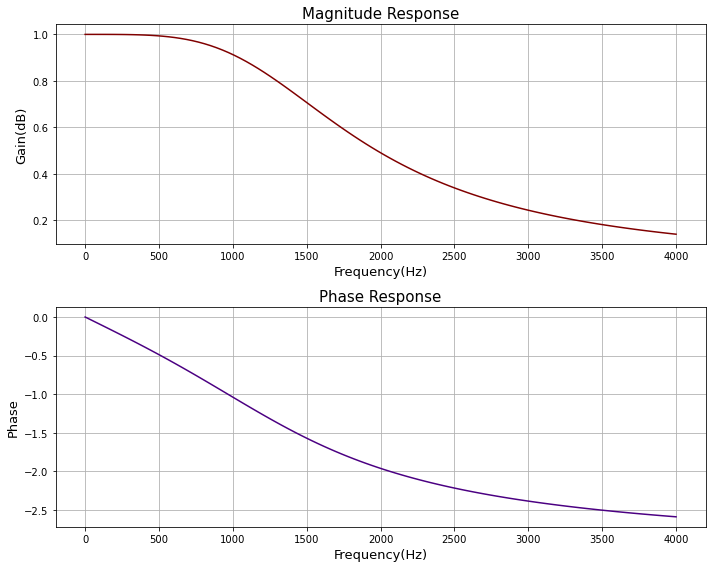

In [16]:
# Defining the transfer function H(s)

w = np.linspace(0,np.pi,100)
N = len(w)
H = [0j]*N

for i in range(N):
    s = 1j*w[i]
    H[i] = (1.39) / (s**2 + 1.67*s + 1.39)
    
# Computing the magnitude and phase spectrum
mag = [0]*N
phase = [0]*N

for i in range(N):
    mag[i],phase[i] = cmath.polar(H[i])


phase1 = np.zeros(N)

for i in range(N):
    phase1[i] = phase[i-int(N/2)]
    
f = np.linspace(0,4000,100)
# Plotting the frequency spectrum of the signal
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(f,mag, color='maroon')
plt.title('Magnitude Response',size=15)
plt.xlabel('Frequency(Hz)', size=13)
plt.ylabel('Gain(dB)', size=13)
plt.grid()

plt.subplot(2,1,2)
plt.plot(f,phase, color='indigo')
plt.title('Phase Response',size=15)
plt.xlabel('Frequency(Hz)', size=13)
plt.ylabel('Phase', size=13)
plt.grid()

plt.tight_layout()
plt.show()


### Queestion 6:

In [17]:
# Generating a random sequence of length N = 1024
N = 1024
x = np.random.random(N)

### Computing DFT:

In [18]:
def DFT(x):
    N = np.shape(x)[0]
    rows = N 
    cols = N

    W = [[0 for i in range(rows)] for j in range(cols)]
    operations = 0

    begin = time.time()

    # Computing the DFT of the random sequence
    for i in range(rows):
        for k in range(cols):
            W[i][k] = np.exp(2j*np.pi*k/N)**i
            operations += 1       # Counting number of operations required for computing DFT

    X = (1/np.sqrt(N)) * np.dot(W,x)

    end = time.time()
    
    t1 = end-begin

    return t1,operations,X

t1,n1,_ = DFT(x)

print('\nNumber of operations required for computing the DFT are ',n1)
print(f'\nTotal runtime of the program is {t1:.2f} sec')



Number of operations required for computing the DFT are  1048576

Total runtime of the program is 1.80 sec


### Computing DFT using FFT

In [19]:
def DFT_FFT(x):
    begin = time.time()

    X_fft = np.fft.fft(x)

    end = time.time()
    
    t2 = end-begin
    return t2

t2 = DFT_FFT(x)
print(f'\nTotal runtime of the program is {t2:.5} sec')



Total runtime of the program is 0.0018659 sec


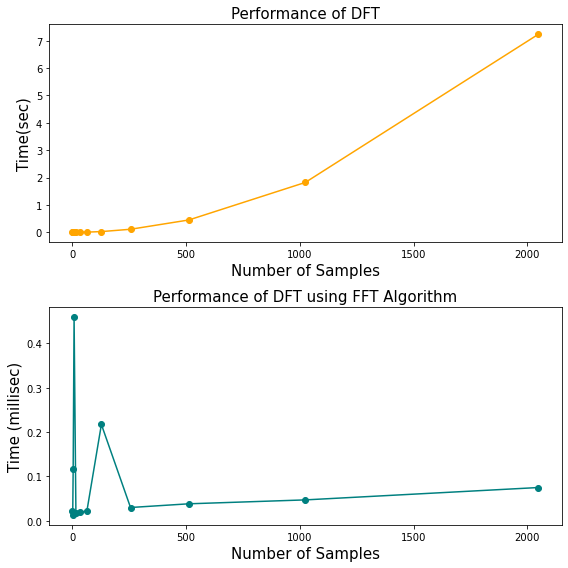

In [22]:
# Comparing the performance for DFT and FFT implementation
N = 2048
t1 = np.zeros(12)
t2 = np.zeros(12)

n=1
i=0
while(n<=N):

    # Generating a random sequence of length n
    x = np.random.randint(low = 0,high =100, size =n)  

    # Computing time required for implementing DFT
    t1[i],_,_ = DFT(x)

    # Computing time required for implementing DFT using FFT
    t2[i] = DFT_FFT(x)

    i += 1
    n *= 2

# Ploting the Performances Curve

n=[1,2,4,8,16,32,64,128,256,512,1024,2048]
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(n,t1, marker='o', color='orange')
plt.xlabel('Number of Samples',size=15)
plt.ylabel('Time(sec)',size=15)
plt.title('Performance of DFT',size=15)


plt.subplot(2,1,2)
plt.plot(n,t2*1000, marker='o', color='teal')
plt.xlabel('Number of Samples',size=15)
plt.ylabel('Time (millisec)',size=15)
plt.title('Performance of DFT using FFT Algorithm',size=15)

plt.tight_layout()
plt.show()

### Question 7:

### Decimation In Time FFT Algorithm:

In [23]:
# Computing DFT using 8-point radix-2 DIT-FFT algorithm

# Given input sequence
x = [1,1,1,1,0,0,0,0]

begin = time.time()

x1 = [0j]*8
x2 = [0j]*8
x3 = [0j]*8

# Finding out the twiddle Factor

W = np.exp(-1j * 2 * np.pi / 8)
W0 = W ** 0
W1 = W
W2 = W * W
W3 = W1 * W2

#Splitting up the given data according to the butterfly structure of The DIT-FFT Algorithm

# Stage 1:
x1[0] = x[0] + x[4]
x1[1] = x[0] - x[4]

x1[2] = x[2] + x[6]
x1[3] = x[2] - x[6]

x1[4] = x[1] + x[5]
x1[5] = x[1] - x[5]

x1[6] = x[3] + x[7]
x1[7] = x[3] - x[7]

# Stage 2:
x2[0] = x1[0] + W0 * x1[2]
x2[1] = x1[1] + W2 * x1[3]
x2[2] = x1[0] - W0 * x1[2]
x2[3] = x1[1] - W2 * x1[3]

x2[4] = x1[4] + W0 * x1[6]
x2[5] = x1[5] + W2 * x1[7]
x2[6] = x1[4] - W0 * x1[6]
x2[7] = x1[5] - W2 * x1[7]

# Stage 3:
x3[0] = x2[0] + W0 * x2[4]
x3[1] = x2[1] + W1 * x2[5]
x3[2] = x2[2] + W2 * x2[6]
x3[3] = x2[3] + W3 * x2[7]
x3[4] = x2[0] - W0 * x2[4]
x3[5] = x2[1] - W1 * x2[5]
x3[6] = x2[2] - W2 * x2[6]
x3[7] = x2[3] - W3 * x2[7]


# Computing the magnitude and phase spectrum
mag1 = [0]*8
phase1 = [0]*8

for i in range(8):
    mag1[i],phase1[i] = cmath.polar(x3[i])

end = time.time()

print(f'\nTime taken to run the code is {end-begin:.5} sec')


Time taken to run the code is 0.0013981 sec


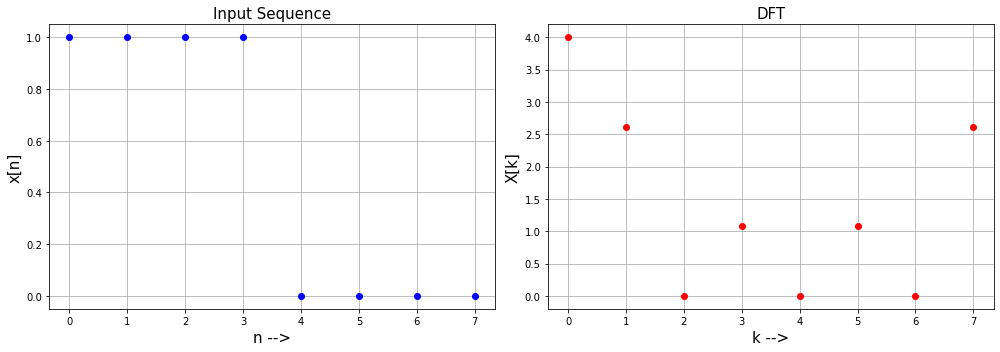

In [25]:
# Plotting the given sequence and the resulting DFT
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(x, 'bo')
plt.title('Input Sequence',size=15)
plt.xlabel('n -->',size=15)
plt.ylabel('x[n]',size=15)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot( mag1, 'ro')
plt.title('DFT',size=15)
plt.xlabel('k -->',size=15)
plt.ylabel('X[k]',size=15)
plt.grid()

plt.tight_layout()
plt.show()

### Question 8:

### Decimation in Frequency FFT Algorithm:

In [26]:
# Computing DFT using 8-point radix-2 DIF-FFT algorithm

# Given input sequence
x = [1,1,1,1,0,0,0,0]

begin = time.time()

x1 = [0j]*8
x2 = [0j]*8
x3 = [0j]*8

# Finding out the twiddle Factor

W = np.exp(-1j * 2 * np.pi / 8)
W0 = W ** 0
W1 = W
W2 = W * W
W3 = W1 * W2

# Splitting up the given data according to the butterfly structure of The DIF-FFT Algorithm

## Stage 1:
x1[0] = x[0] + x[4]
x1[1] = x[1] + x[5]
x1[2] = x[2] + x[6]
x1[3] = x[3] + x[7]

x1[4] = (x[0] - x[4]) * W0
x1[5] = (x[1] - x[5]) * W1
x1[6] = (x[2] - x[6]) * W2
x1[7] = (x[3] - x[7]) * W3

## Stage 2:
x2[0] = x1[0] + x1[2]
x2[1] = x1[1] + x1[3]

x2[2] = (x1[0] - x1[2]) * W0
x2[3] = (x1[1] - x1[3]) * W2

x2[4] = x1[4] + x1[6]
x2[5] = x1[5] + x1[7]

x2[6] = (x1[4] - x1[6]) * W0
x2[7] = (x1[5] - x1[7]) * W2

## Stage 3:
x3[0] = x2[0] + x2[1]
x3[4] = x2[0] - x2[1]
x3[2] = x2[2] + x2[3]
x3[6] = x2[2] - x2[3]

x3[1] = x2[4] + x2[5]
x3[5] = x2[4] - x2[5]
x3[3] = x2[6] + x2[7]
x3[7] = x2[6] - x2[7]


# Computing the magnitude and phase spectrum
mag2 = [0]*8
phase2 = [0]*8

for i in range(8):
    mag2[i],phase2[i] = cmath.polar(x3[i])

end = time.time()

print(f'\nTime taken to run the code is {end-begin:.5} sec')


Time taken to run the code is 0.00084233 sec


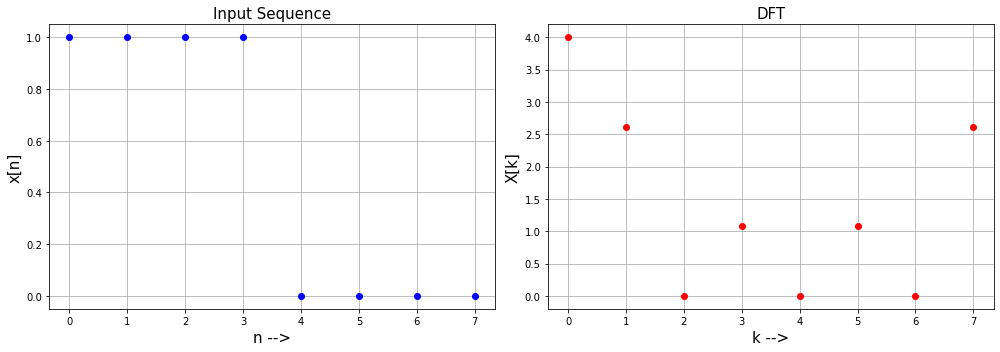

In [28]:
# Plotting the given sequence and the resulting DFT
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(x, 'bo')
plt.title('Input Sequence',size=15)
plt.xlabel('n -->',size=15)
plt.ylabel('x[n]',size=15)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot( mag2, 'ro')
plt.title('DFT',size=15)
plt.xlabel('k -->',size=15)
plt.ylabel('X[k]',size=15)
plt.grid()

plt.tight_layout()
plt.show()

### Question 9:

### Linear Convolution:

In [29]:
'''
Defining the Linear Convolution function
y[n] = x[n]*h[n]
'''
def linear_conv(x,h):
    N1 = np.shape(x)[0]
    N2 = np.shape(h)[0]
    y = [0] * (N1+N2-1)  # Declaring y as a zero array of length N1+N2-1
    
    for i in range(N1):
        for j in range(N2):
            y[i+j] += x[i]*h[j] 

    return y

In [30]:
x = [1,2,3,1]
h = [1,1,1]

y1 = linear_conv(x,h)
print('\nLinear Convolution of x and h gives:\n',y1)


Linear Convolution of x and h gives:
 [1, 3, 6, 6, 4, 1]


### Circular Convolution:

In [32]:
# Defining the Circular Convolution function

def circular_conv(x,h):
    N1 = np.shape(x)[0]
    N2 = np.shape(h)[0]
    y = [0] * (N1+N2-1)  # Declaring y as a zero array of length N1+N2-1
    
    for i in range(N1):
        for j in range(N2):
            y[i+j] += x[i]*h[j] 
            
    N = max(N1,N2)  
    
    for i in range(N1+N2-1):
        
        if i< (N1+N2-1-N):
            y[i] += y[N+i]
        
        elif i>=N:
            y.pop(-1)
            
    return y

y2 = circular_conv(x,h)
print('\nCircular Convolution of x and h gives:\n',y2)


Circular Convolution of x and h gives:
 [5, 4, 6, 6]


### Circular Convolution using matrix multiplication:
$$ Y = \begin {bmatrix} 1&1&3&2 \\ 2&1&1&3 \\ 3&2&1&1 \\ 1&3&2&1 \end{bmatrix}
\begin{bmatrix} 1 \\ 1 \\ 1 \\ 0 \end{bmatrix}
$$

In [33]:
# Since len(x) is not equal to len(h), we carry out zero padding to make it equal.
h = [1,1,1,0]

X = [[1,1,3,2],[2,1,1,3],[3,2,1,1],[1,3,2,1]]

y3 = np.dot(X,h)

print('\nCircular Convolution of x and h gives:\n',y3)


Circular Convolution of x and h gives:
 [5 4 6 6]
